#Layer evolution using Garcia-Mellado scaling

### Plot links

- [top layer scaling](#top-scale)

- [bottom layer scaling](#bot-scale)

- [zf0 vs. h0](#zf0-h0)

- [8 hour profiles for L0 31](#l031-hist)

- [Conclusions](#conclusions)



Garcia and Mellado introduce the following scalings:

* Given $N^2=g/\theta_0 \times \gamma$

* $B_0 = g \overline{w^\prime \theta^\prime}/\theta_0$

The the smallest eddy size affected by the background stratification $N^2$ is given by the Ozmidov scale:

* $L_0 = (B_0/N^3)^{1/2}$ (Eq. 3)

We expect the mixed layer to grow at the encroachment rate, so that (assuming large Reynolds number):

* $z_{enc}(t) = \left [ \frac{2 B_0}{N^2} (t - t_0 ) \right ]^{1/2}$


The script [gm_numbers.py](https://github.com/nchaparr/Sam_Output_Anls/blob/phil/gm_numbers.py) calculates these
values for our 7 cases:




In [1]:
import pandas as pd
with pd.HDFStore('paper_table.h5','r') as store:
    df_cases=store.get('cases')
df_cases
#L0 in meters,Nperiod is 1/N in minutes

,name,L0,Nperiod,N,fluxes,gammas
0,Mar12014,18.183713,0.922139,0.018074,60,10.0
1,Dec142013,23.475072,0.922139,0.018074,100,10.0
2,Mar52014,28.750974,0.922139,0.018074,150,10.0
3,Dec202013,30.581238,1.304101,0.012780,60,5.0
4,Nov302013,39.480208,1.304101,0.012780,100,5.0
5,Jan152014_1,48.353183,1.304101,0.012780,150,5.0
6,Dec252013,51.431307,1.844278,0.009037,60,2.5


###Here is a plot of $h/z_{enc}$ vs. time x N: (cases sorted by $L_0$)

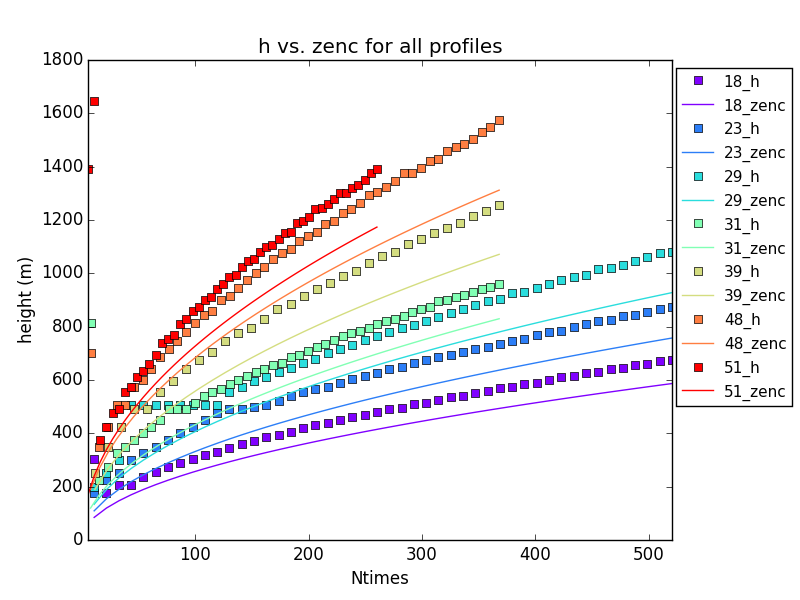

In [18]:
from IPython.display import Image
Image('figures/h_time.png',width=500)

###and here are $h_1/z_{enc}$ and $h_0/z_{enc}$

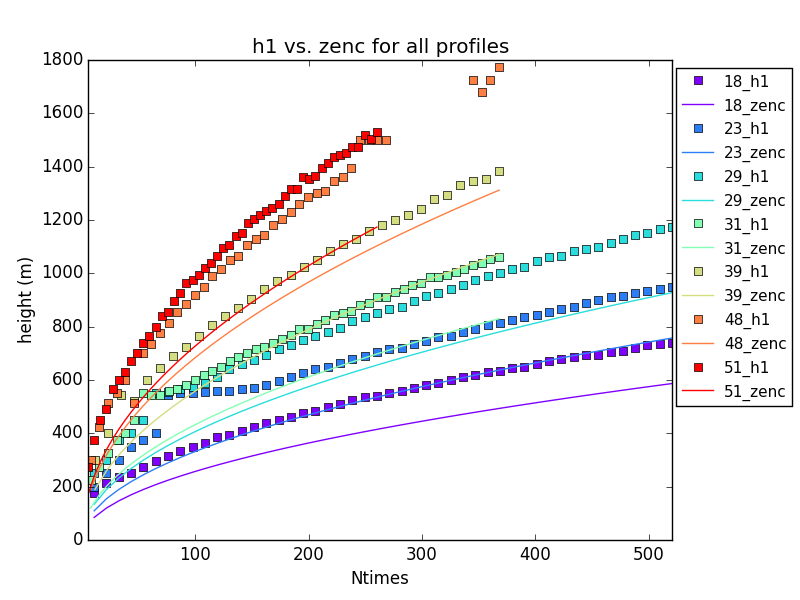

In [19]:
Image('figures/h1_time.png',width=500)

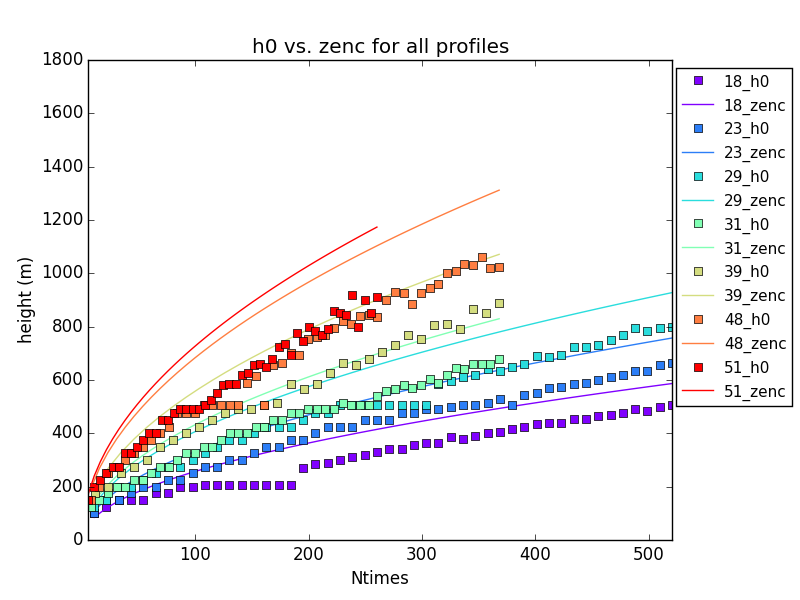

In [20]:
Image('figures/h0_time.png',width=500)

So in all 7 cases the bottom rises at about twice the rate that the top falls as the layer grows

* Garcia-Mellado predict that the upper part of the entrainment layer should grow as:

$\delta/z_{enc} = c_\delta \left ( z_{enc}/L_0) \right )^{-2/3} $ (Eq. 26)

Here is that plot for our 7 cases

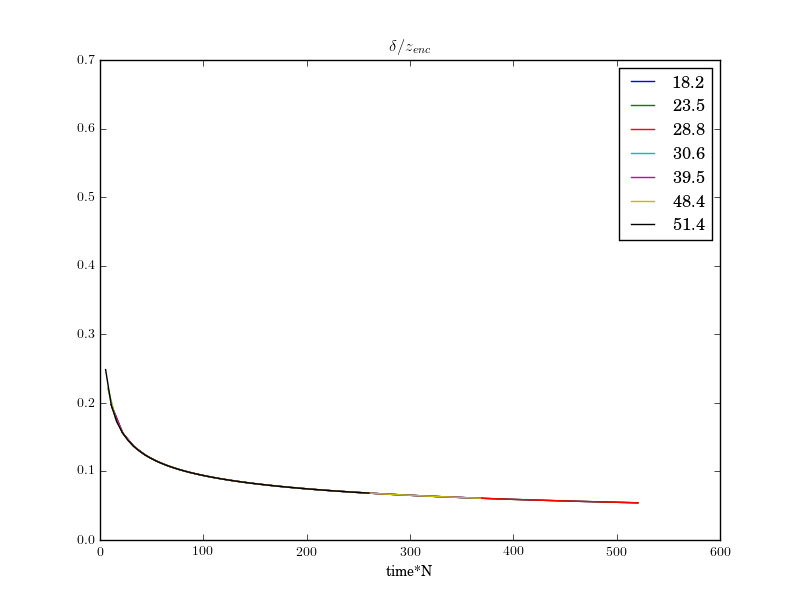

In [21]:
Image('figures/delgm.png',width=500)

* and here is the corresponding plot for (h1 - h)/h:

###Top layer scaling <a name="top-scale"></a>

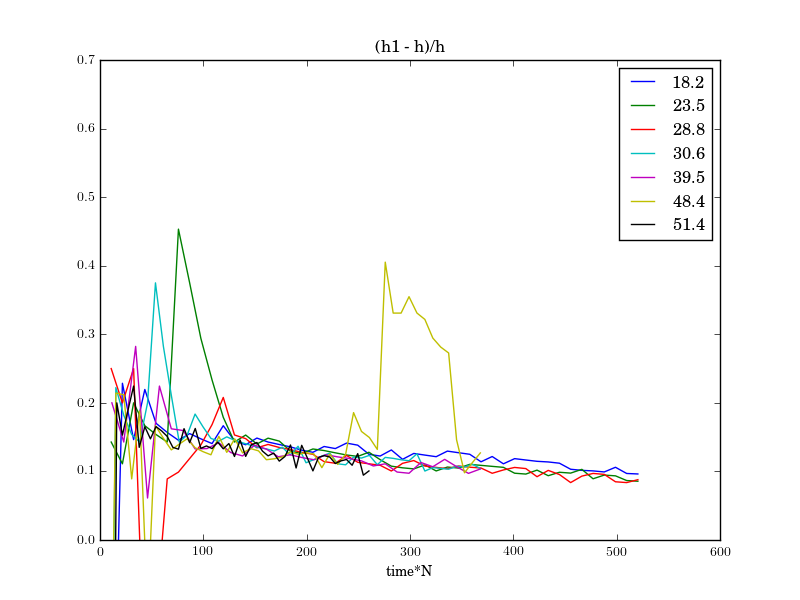

In [22]:
Image('figures/delhtop.png',width=500)

* and for (h - h_0)/h

###bottom layer scaling  <a name="bot-scale"></a>

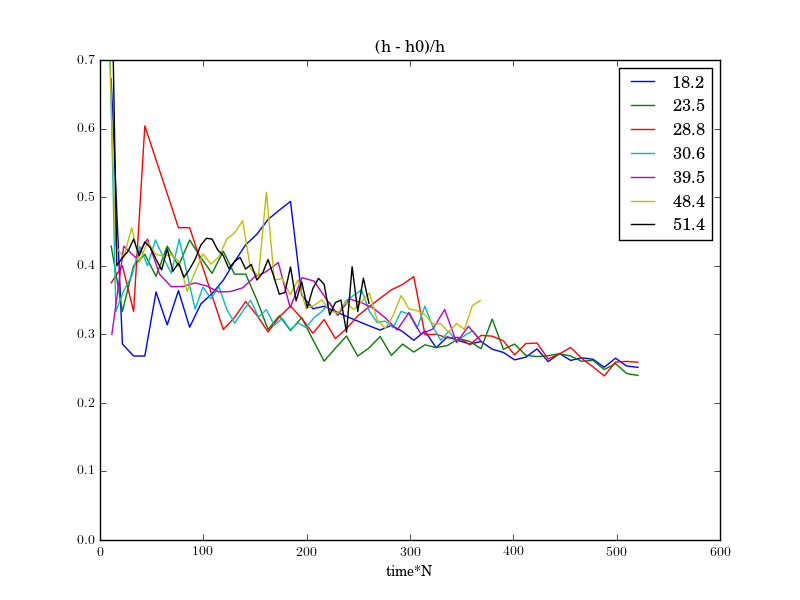

In [23]:
Image('figures/delhbot.png',width=500)

* and here is the total thickness (h1 - h0)/h

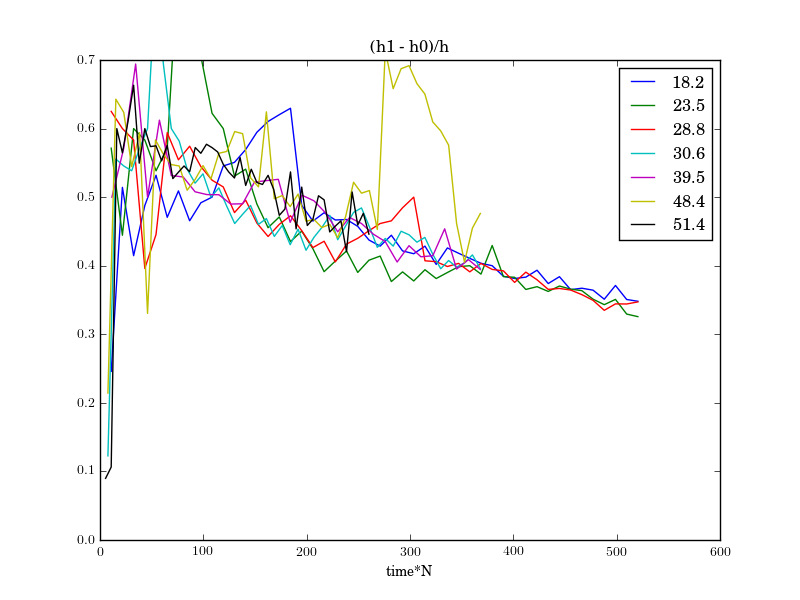

In [24]:
Image('figures/delhtot.png',width=500)

###flux-determined heights

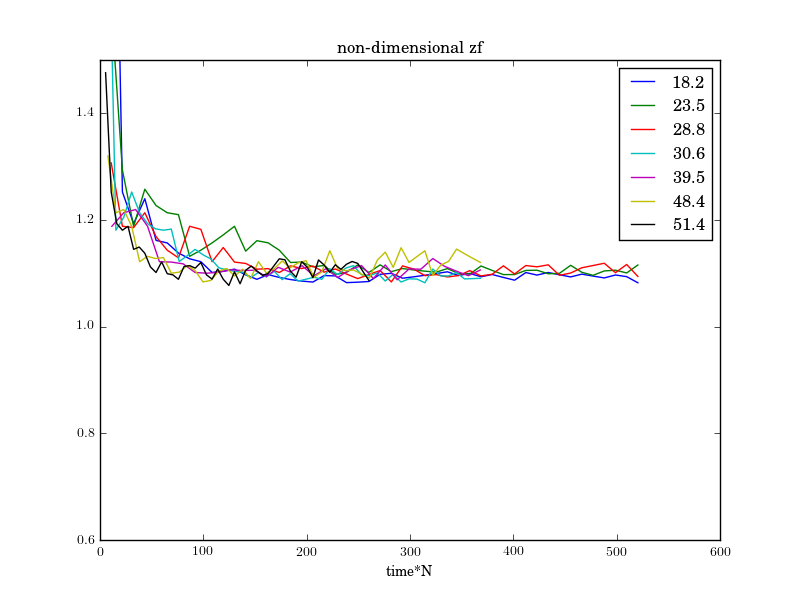

In [25]:
Image('figures/zf.png',width=500)

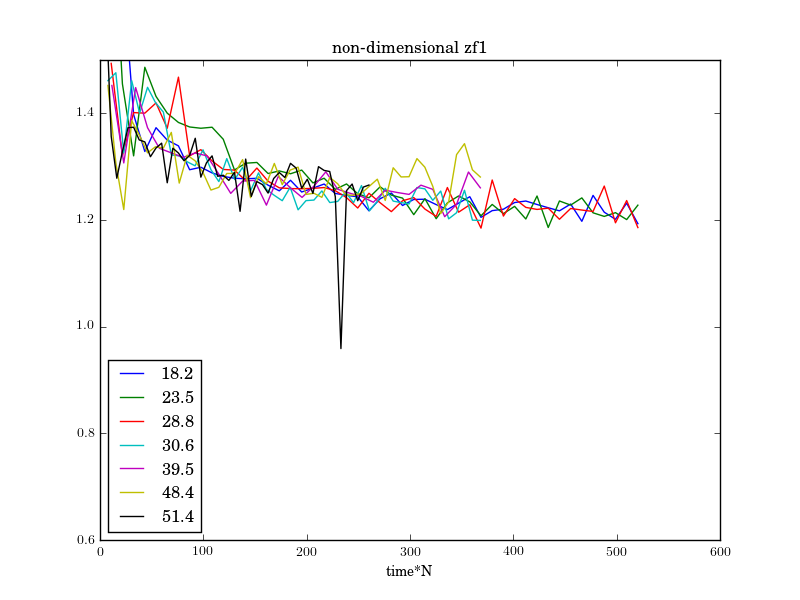

In [26]:
Image('figures/zf1.png',width=500)

In [27]:
Imagefigures/zf0.png',width=500)

SyntaxError: EOL while scanning string literal (<ipython-input-27-c0aabf50bd7f>, line 1)

##Why does h0 increase with time while zf0 remains constant?

1) Look at the three cases that extend to non-dimensional time 500

2) Compare the flux and gradient profiles used to determine h0 and
   zf0 at t=350 and t=500

###zf0 vs. h0  <a name="zf0-h0"></a>

In [12]:
Image('scaled_h0_zf0.png',width=500)

* The middle panel below shows the theta gradient changing while the flux in the same
  region stays relatively constant

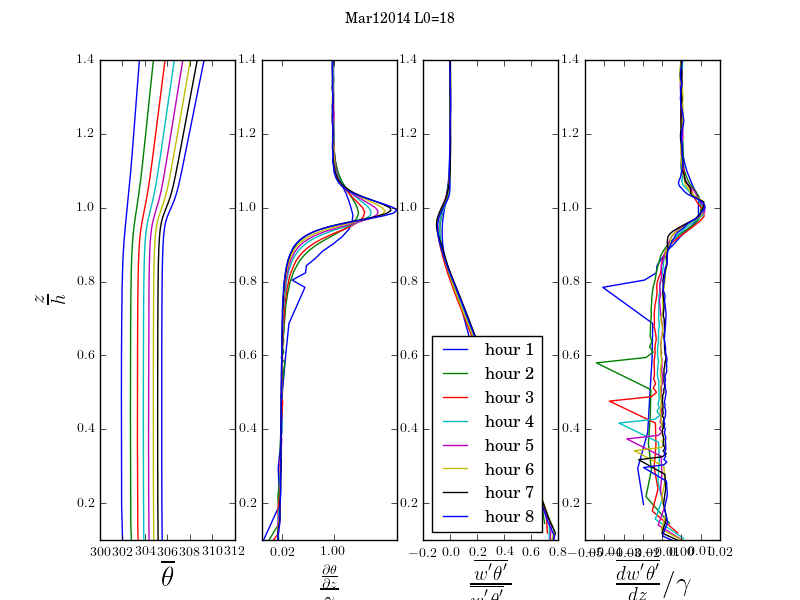

In [28]:
Image('figures/L0_18.png',width=500)

* The figure below shows how h0 is determined for the two times, using
  a threshold of 0.03 for the scaled gradient
  
* The gradient at a height of 0.73 differs by about 20-30% for between
  the early and late profiles

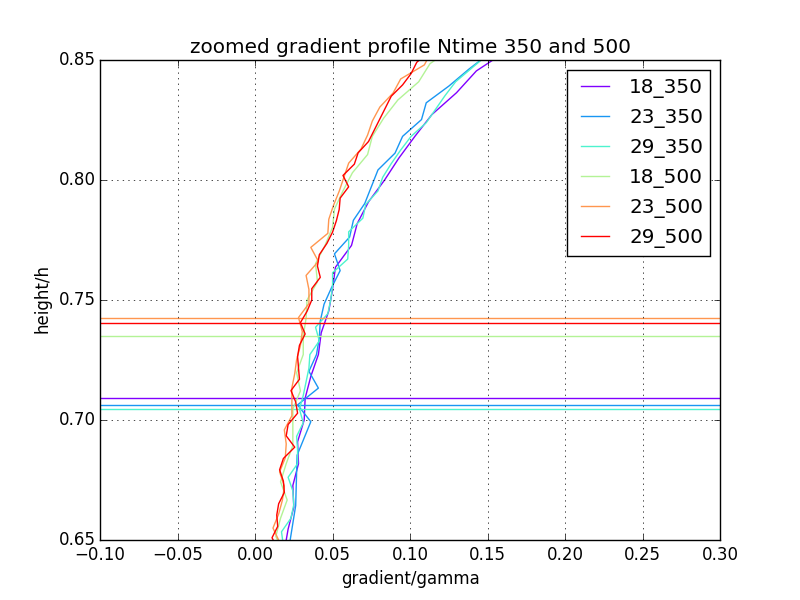

In [32]:
Image('figures/grad_comb_zoom.png',width=500)

* In contrast the zf0 heights don't have clear separation with time, in
  agreement with the time series above

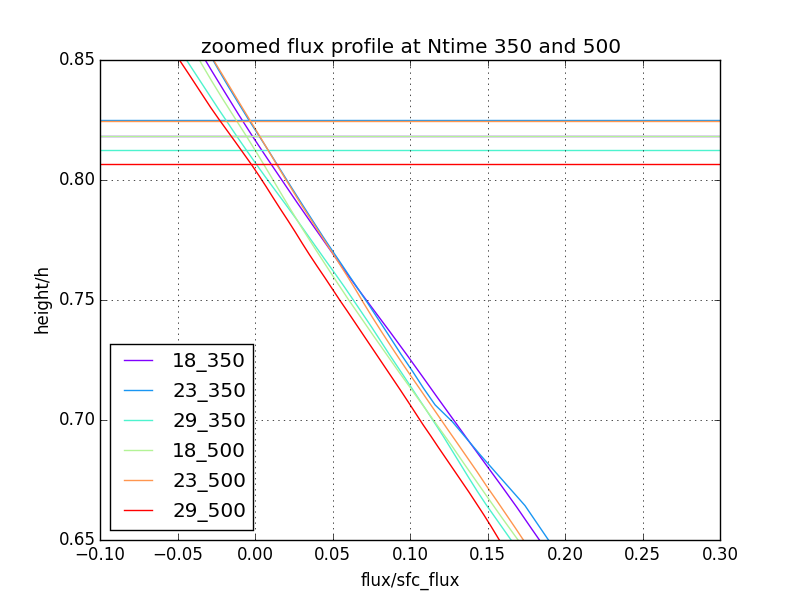

In [33]:
Image('figures/flux_comb_zoom.png',width=500)

* So the puzzle we need to explain is:  The mean theta profile becomes
  about 20% less stable at t=500, but it's not clear that the flux
  divergence is different between the two times for the three cases.
  What is destabilizing the mean state?

Here is $\sqrt{w^{\prime 2}}$

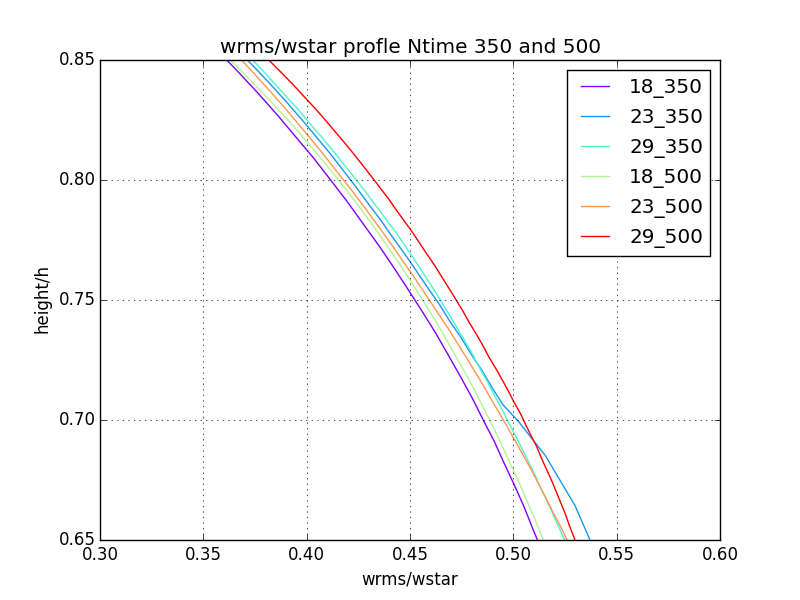

In [36]:
Image('figures/wrms_comb.png',width=500)

###Flux divergence plots

OK -- I've run various scaled and unscaled variations of dFlux/dz.  Here is a typical plot:

###L0=31 profiles  <a name="l031-hist"></a>

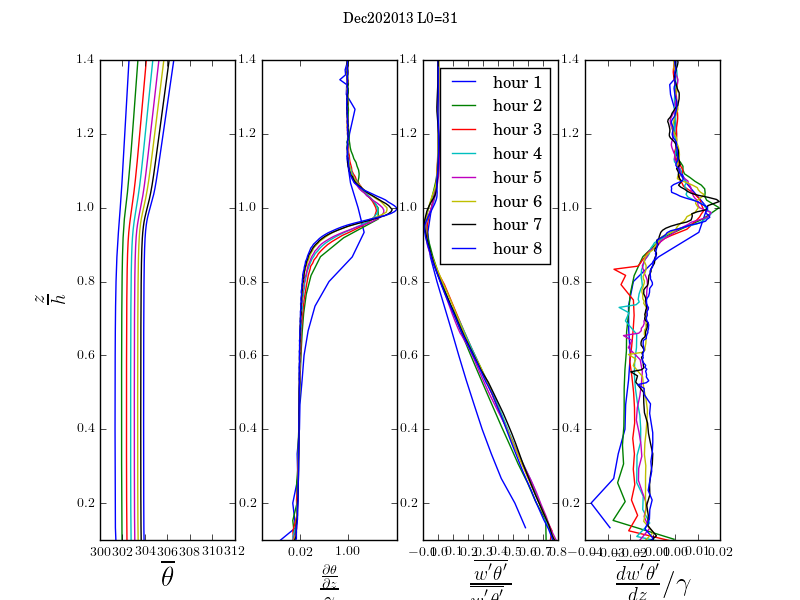

In [37]:
Image('figures/L0_31.png',width=700)

### Conclusions  <a name="conclusions"></a>

So I think the answer to the question about why the gradient profile is behaving differently from the flux profile as we change L0 is that the gradient of thetabar is the time integral of the flux divergence.  This time integration smooths the fluctuations in the flux divergence so that we can get a reliable length scale from the simulation data, and this new h0 length scale, which is telling us something about the  flux divergence profile, scales in an interesting way with gamma.     This also means that we aren't going to learn much more by looking at snapshots of the quadrant fluxes -- we would need to time integrate those to connect them to the theta profile, which is outside of the scope of the paper. 